## Part 3 : prediction of the winner of a nba game (classification )

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

#Get the data
inputs = np.load("inputs.npy")
labels = np.load("labels.npy")
labels = labels[:, 0]

# Define split strategy
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=None)

We have here data about the half time of basketball matches.

We chose to use the shuffleSplit strategy for the crossvalidation.

The data has 600 rows and we take 20% of it as testing data and the rest as training data.

We will also shuffle and split the training data 20 times for the cross-validation.

We will try using two different classification models, perceptron, to predict which team is going to win and determine which is best.  We will validate the accuracy of predictions with cross-validation.

### Classification with k-nearest neighbors:

We start by tuning the n_neighbors parameter by trying on a wide spectrum of values.

In [3]:
n_neighbors = np.arange(5, 150, 3)
acc = []
for nn in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=nn, algorithm='kd_tree', leaf_size=30)
    acc = np.append(acc, cross_val_score(clf, inputs, labels, cv=cv).mean())

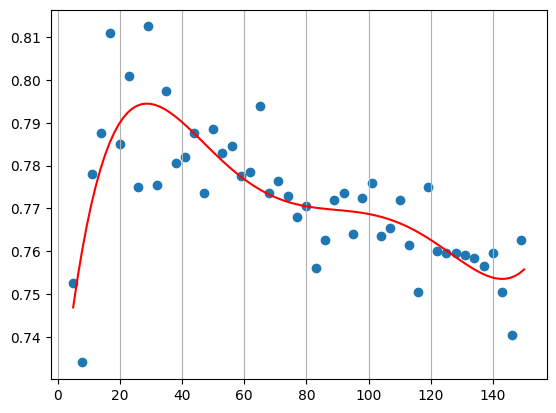

In [4]:
model5 = np.poly1d(np.polyfit(n_neighbors, acc, 5))
polyline = np.linspace(min(n_neighbors), max(n_neighbors)+1, 100)

fig, ax = plt.subplots()
ax.grid(axis='x')
ax.scatter(n_neighbors, acc)
plt.plot(polyline, model5(polyline), color='red')

We can observe that the classifier is most accurate with between 25 and 30 neighbors and that using the kd_tree algorithm is a lot faster and keeps the same accuracy.

In [5]:
# Classification of the data using k-nearest neighbors
clf = KNeighborsClassifier(n_neighbors=27, algorithm='kd_tree')
# Cross-validation to tune the hyperparameters
scores = cross_val_score(clf, inputs, labels, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.03


In the end, we obtained better results by setting the number of neighbors at 27. The other parameters stay at their default values because changing them did not have any positive impact on the accuracy of the results.
With this parameter, we get an accuracy between 0.78 and 0.81 with a standard deviation between 0.02 and 0.04.

### Classification with Perceptron:

In [6]:
# Classification of the data using Perceptron
clf = Perceptron(penalty='l1')

# Cross-validation to tune the hyperparameters
scores = cross_val_score(clf, inputs, labels, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.03


After manually tuning the values of different parameters, we obtained better results by adding an L1 penalty term.The other parameters did not have any positive impact on the accuracy of the results when changing them.
With this parameter, we get an accuracy between 0.88 and 0.91 with a standard deviation between 0.02 and 0.04.

### Conclusion

The perceptron classifier is out-performing the k-neighbors classifier by a lot in term of accuracy and has the same standard deviation.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e02551f1-9953-47df-879b-6776493df133' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>